<a href="https://colab.research.google.com/github/kazimhsayed/Astrostatistics/blob/main/ECLIPSE1919_PARAMETER_ESTIMATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import copy

In [ ]:


no_of_parameters = 7    #I WILL USE THIS TO SCALE THE RADIUS WHICH IS UNIFORM, SEE BELOW. IT WILL ALSO BE USED FOR HMC'S GUASSIAN

N = 100000                #THIS IS FOR THE NO OF TRIALS WE WILL HAVE FOR THE PROPOSED DISTRIBUTION FOR MH-MCMC

no_of_chains=4            #MULTIPLE CHAINS FOR SAMPLING


'''Do you want the proposal process to be uniform or guassian in the MH-MCMC, 
Enter g=0 for uniform(RADIALLY SYMMETRIC N'DIMENSIONAL HYPERSPHERE WHICH CAN BE SCALED TOO), 
g=1 for guassian'''
g=1


'''Input Data'''
x=np.array([-1.261,-0.16,0.334,0.348,0.587,0.860,1.079])
y=np.array([-0.16,-1.107,0.472,0.360,1.099,1.321,-0.328])
onesies=np.ones(len(x))
Ex=np.array([-0.587,-0.557,-0.186,-0.222,0.080,0.158,1.540])
Ey=np.array([0.036,-0.789,1.336,1.574,0.726,0.589,-0.156])
Dx_obs=np.array([-1.416,-1.221,-1.054,-1.079,-1.012,-0.999,-0.733])+1.5*onesies
Dy_obs=np.array([-1.324,-1.312,-0.944,-0.862,-0.932,-0.948,-1.019])+1.324*onesies
sigma_Dx=0.05
sigma_Dy=0.05

#Unused but you may print the data if you want
data = "https://raw.githubusercontent.com/kazimhsayed/Astrostatistics/main/eddington.dat"
# print(data)


'''RETURNS LOG OF LIKELIHOOD'''
def fu(alpha,a,b,c,d,e,f):
  Dx_mod= a*x + b*y +c*onesies + alpha*Ex
  Dy_mod= d*x + e*y +f*onesies + alpha*Ey
  Diff_x=Dx_obs-Dx_mod
  Diff_y=Dy_obs-Dy_mod

  log_p = (-1/(2*sigma_Dx**2) * np.dot(Diff_x , Diff_x))+(-1/(2*sigma_Dy**2) * np.dot(Diff_y , Diff_y))               #LOG OF LIKELIHOOD
  return log_p


if g==0:
  #I AM USING A R,THETA APPROACH FOR A CIRCULARLY SYMMETRIC PROPOSAL DISTRIBUTION IF THE X'S REMAIN UNSCALED
  #WHICH IS SCALED BY NUMBER OF PARAMETERS TO ACCOUNT FOR FALL OF DENSITY IN THE PARAMETER SPACE
  r = np.random.uniform(0, 0.001, size=(no_of_chains,N)) ** (1 / (no_of_parameters))
  theta_0 = np.random.uniform(0, 2 * np.pi, size=(no_of_chains,N))          
  
  theta_1 = np.random.uniform(0, np.pi, size=(no_of_chains,N))
  theta_2 = np.random.uniform(0, np.pi, size=(no_of_chains,N))
  theta_3 = np.random.uniform(0, np.pi, size=(no_of_chains,N))
  theta_4 = np.random.uniform(0, np.pi, size=(no_of_chains,N))
  theta_5 = np.random.uniform(0, np.pi, size=(no_of_chains,N)) 


  x0= r * np.cos(theta_1)
  x1= r * np.sin(theta_1) * np.cos(theta_2)
  x2= r * np.sin(theta_1) * np.sin(theta_2) * np.cos(theta_3)
  x3= r * np.sin(theta_1) * np.sin(theta_2) * np.sin(theta_3) * np.cos(theta_4)
  x4= r * np.sin(theta_1) * np.sin(theta_2) * np.sin(theta_3) * np.sin(theta_4) * np.cos(theta_5)
  x5= r * np.sin(theta_1) * np.sin(theta_2) * np.sin(theta_3) * np.sin(theta_4) * np.sin(theta_5) * np.cos(theta_0)
  x6= r * np.sin(theta_1) * np.sin(theta_2) * np.sin(theta_3) * np.sin(theta_4) * np.sin(theta_5) * np.sin(theta_0)
  
  
  

if g==1:
    
  #HERE FOR GUASSIAN PROPOSAL, EACH X IN ORDER CORRESPONDS TO alpha,a,b,c,d,e,f in order
  variancee=0.001
  
  x0=np.random.normal(0,20*variancee, size=(no_of_chains,N))
  x1=np.random.normal(0,10*variancee, size=(no_of_chains,N))
  x2=np.random.normal(0,5*variancee, size=(no_of_chains,N))
  x3=np.random.normal(0,5*variancee, size=(no_of_chains,N))
  x4=np.random.normal(0,10*variancee, size=(no_of_chains,N))
  x5=np.random.normal(0,5*variancee, size=(no_of_chains,N))
  x6=np.random.normal(0,5*variancee, size=(no_of_chains,N))
  
  
  
#THE INITIAL VALUE OR WHERE THE CHAINS ARE STARTING
x_alpha = np.random.normal(0.133, 1,size=(no_of_chains,1))
x_a = np.random.normal(0.166, 1,size=(no_of_chains,1))
x_b = np.random.normal(-0.018, 1,size=(no_of_chains,1))
x_c = np.random.normal(0.386, 1,size=(no_of_chains,1))
x_d = np.random.normal(0.137, 1,size=(no_of_chains,1))
x_e = np.random.normal(0.034, 1,size=(no_of_chains,1))
x_f = np.random.normal(0.167, 1,size=(no_of_chains,1))


likelihood=np.empty([no_of_chains,1])

for i in range(no_of_chains):
  likelihood[i,0]=fu(x_alpha[i,0],x_a[i,0],x_b[i,0],x_c[i,0],x_d[i,0],x_e[i,0],x_f[i,0])



#THIS IS WHERE THE FINAL CHAINS WILL BE APPENDED
x_alpha_master=[]
x_a_master=[]
x_b_master=[]
x_c_master=[]
x_d_master=[]
x_e_master=[]
x_f_master=[]
likelihood_master=[]

#MCMC FOR ALL CHAINS
for v in range(no_of_chains):
  x_alpha_v=x_alpha[v,:]
  x_a_v=x_a[v,:]
  x_b_v=x_b[v,:]
  x_c_v=x_c[v,:]
  x_d_v=x_d[v,:]
  x_e_v=x_e[v,:]
  x_f_v=x_f[v,:]
  likelihood_v=likelihood[v,:]
  for iteration in range(N):
      LnL_prev=likelihood_v[-1]
      alpha_now = x_alpha_v[-1]
      a_now = x_a_v[-1]
      b_now = x_b_v[-1]
      c_now = x_c_v[-1]
      d_now = x_d_v[-1]
      e_now = x_e_v[-1]
      f_now = x_f_v[-1]

      alpha_prev = copy.copy(alpha_now)
      a_prev = copy.copy(a_now)
      b_prev = copy.copy(b_now)
      c_prev = copy.copy(c_now)
      d_prev = copy.copy(d_now)
      e_prev = copy.copy(e_now)
      f_prev = copy.copy(f_now)
      
      alpha_now = alpha_now + x0[v,iteration]
      a_now = a_now + x1[v,iteration]
      b_now = b_now + x2[v,iteration]
      c_now = c_now + x3[v,iteration]
      d_now = d_now + x4[v,iteration]
      e_now = e_now + x5[v,iteration]
      f_now = f_now + x6[v,iteration]
      
      LnL = fu(alpha_now,a_now,b_now,c_now,d_now,e_now,f_now)
      ac_pr = min(np.exp(LnL - LnL_prev), 1)
      if np.random.uniform(0, 1) < ac_pr:
        x_alpha_v = np.append(x_alpha_v, alpha_now)
        x_a_v = np.append(x_a_v, a_now)
        x_b_v = np.append(x_b_v, b_now)
        x_c_v = np.append(x_c_v, c_now)
        x_d_v = np.append(x_d_v, d_now)
        x_e_v = np.append(x_e_v, e_now)
        x_f_v = np.append(x_f_v, f_now)
        likelihood_v=np.append(likelihood_v,LnL)

          
  x_alpha_master.append(x_alpha_v.tolist())
  x_a_master.append(x_a_v.tolist())
  x_b_master.append(x_b_v.tolist())
  x_c_master.append(x_c_v.tolist())
  x_d_master.append(x_d_v.tolist())
  x_e_master.append(x_e_v.tolist())
  x_f_master.append(x_f_v.tolist())
  likelihood_master.append(likelihood_v.tolist())


In [ ]:
#DISCARDING BURN IN and saving data for stationary distribution


min_len_chain = N
for i in range(no_of_chains):
    if len(x_alpha_master[i]) < min_len_chain:
        min_len_chain = len(x_alpha_master[i])

        
numbers=np.arange(min_len_chain)


alpha_stationary=np.zeros(0)
a_stationary=np.zeros(0)
b_stationary=np.zeros(0)
c_stationary=np.zeros(0)
d_stationary=np.zeros(0)
e_stationary=np.zeros(0)
f_stationary=np.zeros(0)

likelihood_stationary=np.zeros(0)

cutoff=int(min_len_chain/15)
for i in range(no_of_chains):
    alpha_stationary=np.append(np.array(x_alpha_master[i])[int(cutoff):],alpha_stationary)
    a_stationary=np.append(np.array(x_a_master[i])[int(cutoff):],a_stationary)
    b_stationary=np.append(np.array(x_b_master[i])[int(cutoff):],b_stationary)
    c_stationary=np.append(np.array(x_c_master[i])[int(cutoff):],c_stationary)
    d_stationary=np.append(np.array(x_d_master[i])[int(cutoff):],d_stationary)
    e_stationary=np.append(np.array(x_e_master[i])[int(cutoff):],e_stationary)
    f_stationary=np.append(np.array(x_f_master[i])[int(cutoff):],f_stationary)
    likelihood_stationary=np.append(np.array(likelihood_master[i])[int(cutoff):],likelihood_stationary)


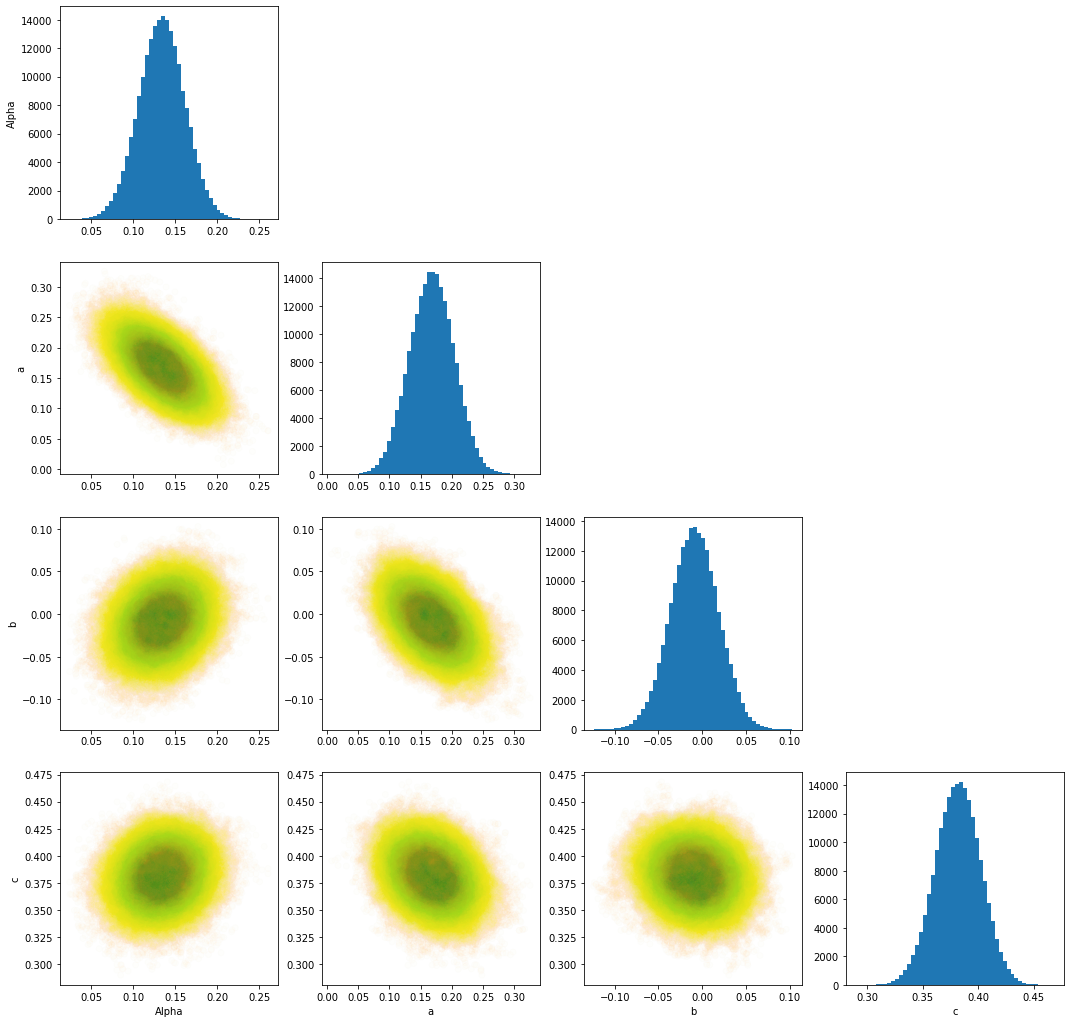

In [ ]:
#THIS IS TO PLOT THE MARGINALISED PLOTS OF alpha, a, b, c WHICH ARE PARAMETS THAT AFFECTED Dx


plt.figure(figsize=(18,18))
plt.subplot(4,4,1)
plt.hist(alpha_stationary,bins=50)
plt.ylabel('Alpha')

plt.subplot(4,4,5)
plt.scatter(alpha_stationary,a_stationary,c=-np.exp(likelihood_stationary),alpha=0.01)
plt.ylabel('a')

plt.subplot(4,4,6)
plt.hist(a_stationary,bins=50)


plt.subplot(4,4,9)
plt.scatter(alpha_stationary,b_stationary,c=-np.exp(likelihood_stationary),alpha=0.01)
plt.ylabel('b')

plt.subplot(4,4,10)
plt.scatter(a_stationary,b_stationary,c=-np.exp(likelihood_stationary),alpha=0.01)

plt.subplot(4,4,11)
plt.hist(b_stationary,bins=50)

plt.subplot(4,4,13)
plt.scatter(alpha_stationary,c_stationary,c=-np.exp(likelihood_stationary),alpha=0.01)
plt.ylabel('c')
plt.xlabel('Alpha')

plt.subplot(4,4,14)
plt.scatter(a_stationary,c_stationary,c=-np.exp(likelihood_stationary),alpha=0.01)
plt.xlabel('a')

plt.subplot(4,4,15)
plt.scatter(b_stationary,c_stationary,c=-np.exp(likelihood_stationary),alpha=0.01)
plt.xlabel('b')

plt.subplot(4,4,16)
plt.hist(c_stationary,bins=50)
plt.xlabel('c')

plt.show()


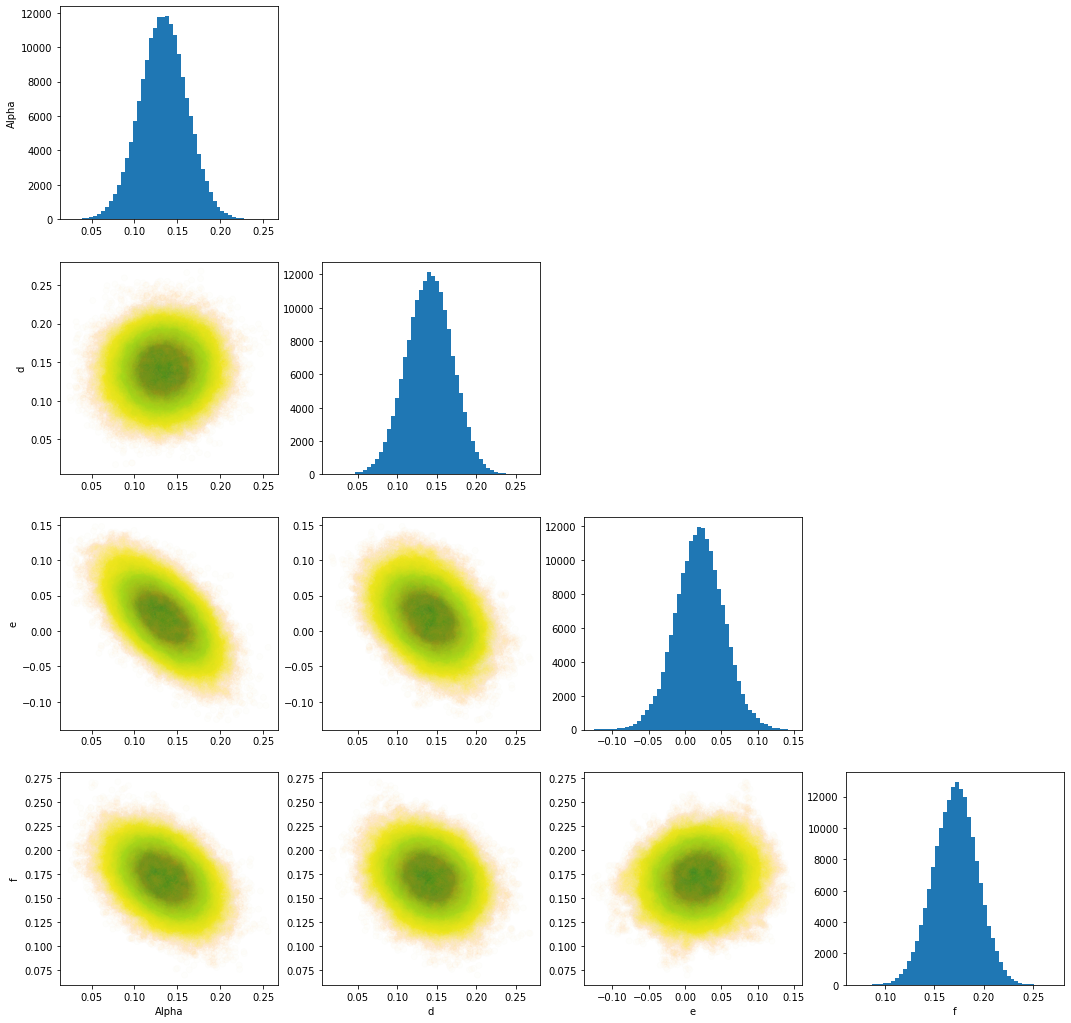

In [ ]:
#THIS IS TO PLOT THE MARGINALISED PLOTS OF alpha, d, e, f WHICH ARE PARAMETS THAT AFFECTED Dy

plt.figure(figsize=(18,18))
plt.subplot(4,4,1)
plt.hist(alpha_stationary,bins=50)
plt.ylabel('Alpha')

plt.subplot(4,4,5)
plt.scatter(alpha_stationary,d_stationary,c=-np.exp(likelihood_stationary),alpha=0.01)
plt.ylabel('d')

plt.subplot(4,4,6)
plt.hist(d_stationary,bins=50)


plt.subplot(4,4,9)
plt.scatter(alpha_stationary,e_stationary,c=-np.exp(likelihood_stationary),alpha=0.01)
plt.ylabel('e')

plt.subplot(4,4,10)
plt.scatter(d_stationary,e_stationary,c=-np.exp(likelihood_stationary),alpha=0.01)

plt.subplot(4,4,11)
plt.hist(e_stationary,bins=50)

plt.subplot(4,4,13)
plt.scatter(alpha_stationary,f_stationary,c=-np.exp(likelihood_stationary),alpha=0.01)
plt.ylabel('f')
plt.xlabel('Alpha')

plt.subplot(4,4,14)
plt.scatter(d_stationary,f_stationary,c=-np.exp(likelihood_stationary),alpha=0.01)
plt.xlabel('d')

plt.subplot(4,4,15)
plt.scatter(e_stationary,f_stationary,c=-np.exp(likelihood_stationary),alpha=0.01)
plt.xlabel('e')

plt.subplot(4,4,16)
plt.hist(f_stationary,bins=50)
plt.xlabel('f')

plt.show()


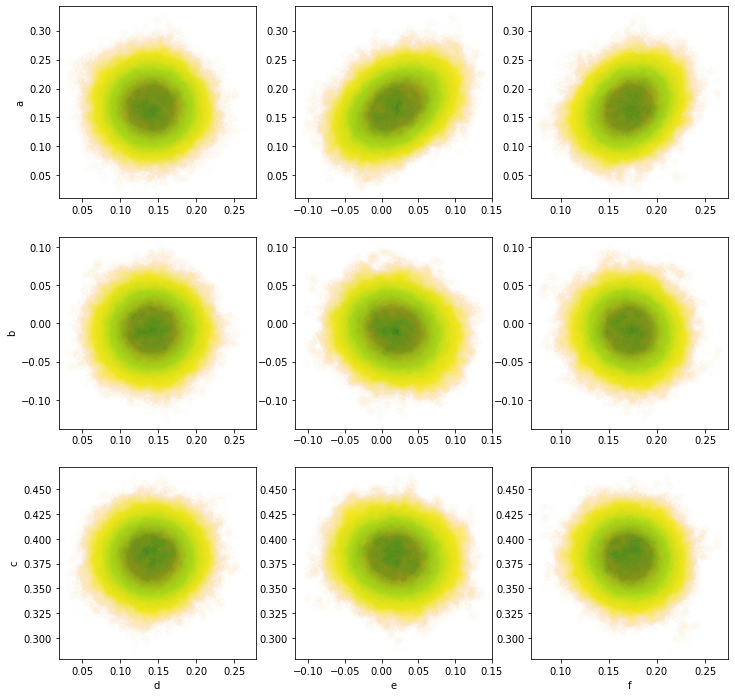

In [ ]:
#THESE ARE THE REMAINING 2D GUASSIANS SHOWCASING THEM BETWEEN THE REMAINING POSSIBLE PAIRS 


plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
plt.scatter(d_stationary,a_stationary,c=-np.exp(likelihood_stationary),alpha=0.01)
plt.ylabel('a')

plt.subplot(3,3,2)
plt.scatter(e_stationary,a_stationary,c=-np.exp(likelihood_stationary),alpha=0.01)


plt.subplot(3,3,3)
plt.scatter(f_stationary,a_stationary,c=-np.exp(likelihood_stationary),alpha=0.01)


plt.subplot(3,3,4)
plt.scatter(d_stationary,b_stationary,c=-np.exp(likelihood_stationary),alpha=0.01)
plt.ylabel('b')

plt.subplot(3,3,5)
plt.scatter(e_stationary,b_stationary,c=-np.exp(likelihood_stationary),alpha=0.01)

plt.subplot(3,3,6)
plt.scatter(f_stationary,b_stationary,c=-np.exp(likelihood_stationary),alpha=0.01)

plt.subplot(3,3,7)
plt.scatter(d_stationary,c_stationary,c=-np.exp(likelihood_stationary),alpha=0.01)
plt.ylabel('c')
plt.xlabel('d')

plt.subplot(3,3,8)
plt.scatter(e_stationary,c_stationary,c=-np.exp(likelihood_stationary),alpha=0.01)
plt.xlabel('e')

plt.subplot(3,3,9)
plt.scatter(f_stationary,c_stationary,c=-np.exp(likelihood_stationary),alpha=0.01)
plt.xlabel('f')

plt.show()


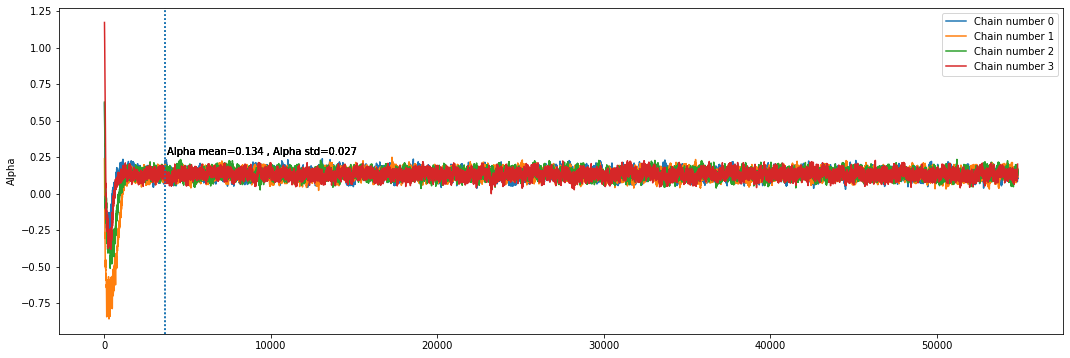

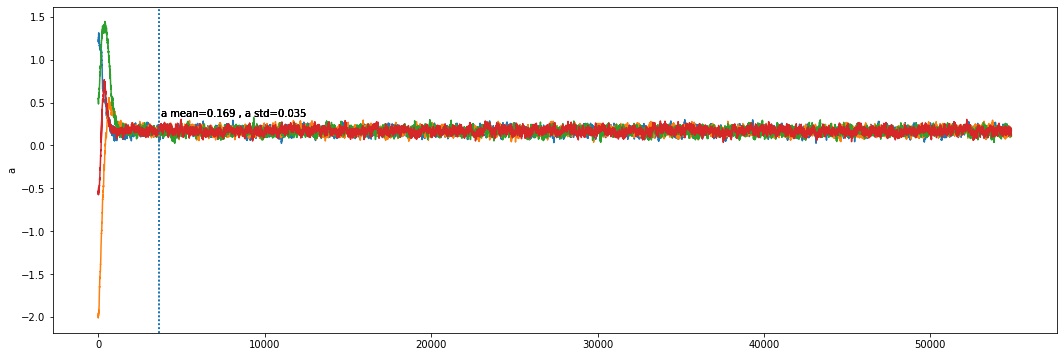

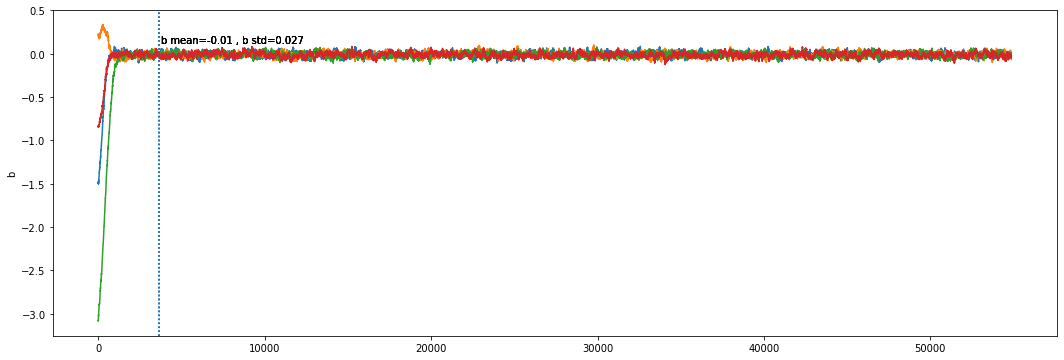

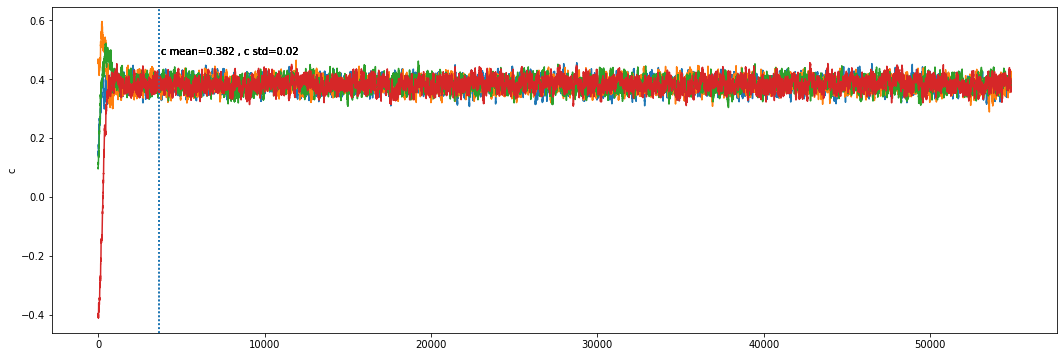

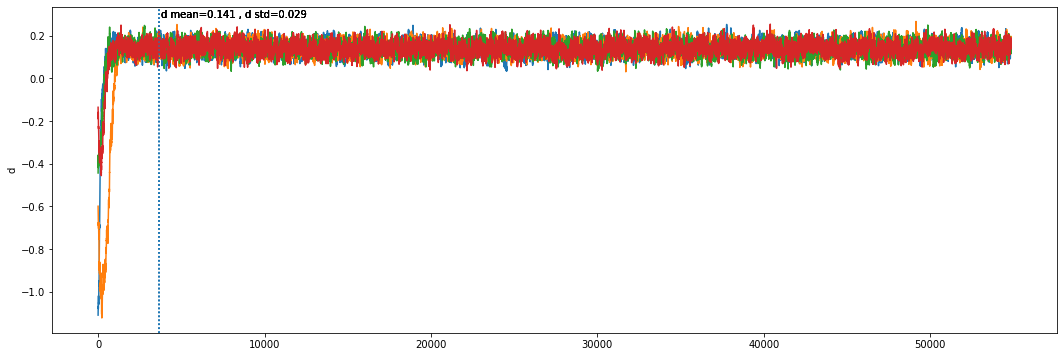

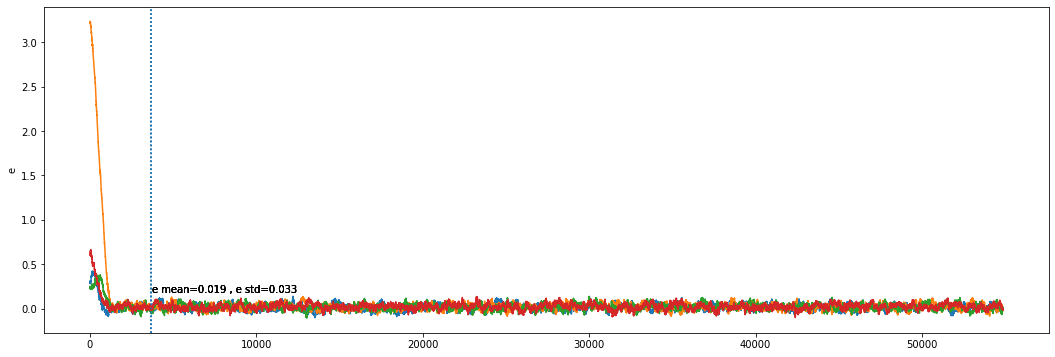

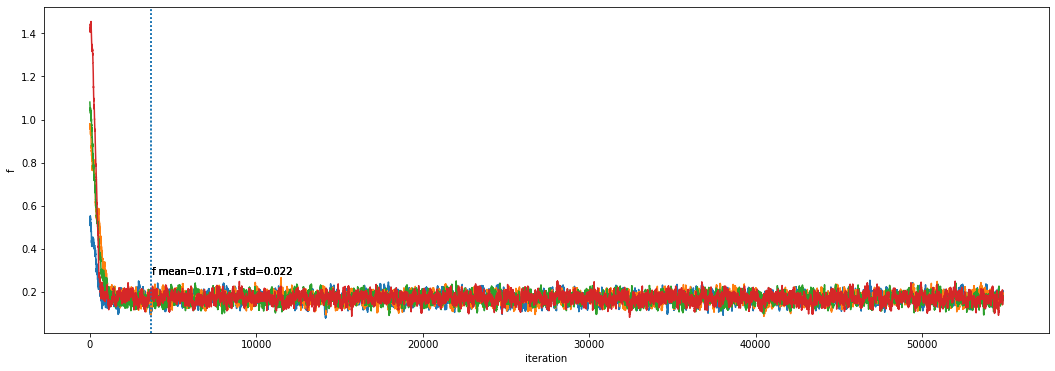

In [ ]:
#THIS IS TO PLOT THE TRACE PLOTS AND MENTION MEAN AND STD AFTER CUTOFF(STATIONARY STATE)

plt.figure(figsize=(18,6))
for i in range(no_of_chains):
  plt.plot(numbers,np.array(x_alpha_master[i])[:min_len_chain],label=f'Chain number {i}')
  plt.axvline(cutoff,linestyle=':')
  plt.text(cutoff+100,np.mean(alpha_stationary)+5*np.std(alpha_stationary),f'Alpha mean={np.round(np.mean(alpha_stationary),3)} , Alpha std={np.round(np.std(alpha_stationary),3)}')
  plt.ylabel('Alpha')
  plt.legend()
plt.show()

plt.figure(figsize=(18,6))
for i in range(no_of_chains):
  plt.plot(numbers,np.array(x_a_master[i])[:min_len_chain])
  plt.text(cutoff+100,np.mean(a_stationary)+5*np.std(a_stationary),f'a mean={np.round(np.mean(a_stationary),3)} , a std={np.round(np.std(a_stationary),3)}')
  plt.axvline(cutoff,linestyle=':')
  plt.ylabel('a')
plt.show()

plt.figure(figsize=(18,6))
for i in range(no_of_chains):
  plt.plot(numbers,np.array(x_b_master[i])[:min_len_chain])
  plt.text(cutoff+100,np.mean(b_stationary)+5*np.std(b_stationary),f'b mean={np.round(np.mean(b_stationary),3)} , b std={np.round(np.std(b_stationary),3)}')
  plt.axvline(cutoff,linestyle=':')
  plt.ylabel('b')
plt.show()

plt.figure(figsize=(18,6))
for i in range(no_of_chains):
  plt.plot(numbers,np.array(x_c_master[i])[:min_len_chain])
  plt.text(cutoff+100,np.mean(c_stationary)+5*np.std(c_stationary),f'c mean={np.round(np.mean(c_stationary),3)} , c std={np.round(np.std(c_stationary),3)}')
  plt.axvline(cutoff,linestyle=':')
  plt.ylabel('c')
plt.show()

plt.figure(figsize=(18,6))
for i in range(no_of_chains):
  plt.plot(numbers,np.array(x_d_master[i])[:min_len_chain])
  plt.text(cutoff+100,np.mean(d_stationary)+5*np.std(d_stationary),f'd mean={np.round(np.mean(d_stationary),3)} , d std={np.round(np.std(d_stationary),3)}')
  plt.axvline(cutoff,linestyle=':')
  plt.ylabel('d')
plt.show()

plt.figure(figsize=(18,6))
for i in range(no_of_chains):
  plt.plot(numbers,np.array(x_e_master[i])[:min_len_chain])
  plt.text(cutoff+100,np.mean(e_stationary)+5*np.std(e_stationary),f'e mean={np.round(np.mean(e_stationary),3)} , e std={np.round(np.std(e_stationary),3)}')
  
  plt.axvline(cutoff,linestyle=':')
  plt.ylabel('e')
plt.show()

plt.figure(figsize=(18,6))
for i in range(no_of_chains):
  plt.plot(numbers,np.array(x_f_master[i])[:min_len_chain])
  plt.text(cutoff+100,np.mean(f_stationary)+5*np.std(f_stationary),f'f mean={np.round(np.mean(f_stationary),3)} , f std={np.round(np.std(f_stationary),3)}')
  
  plt.axvline(cutoff,linestyle=':')
  plt.ylabel('f')
  plt.xlabel('iteration')
plt.show()




In [ ]:
'''GENERALISABLE N DIMENSIONAL HAMILTONIAN MONTE CARLO'''

#FOR N-DIMENSIONAL GAUSSIAN
for_cov_mat = np.stack((alpha_stationary, a_stationary, b_stationary, c_stationary, d_stationary, e_stationary, f_stationary), axis = 0)

cov_of_guassian=np.cov(for_cov_mat)

inverse_of_guassian_cov = np.linalg.inv(cov_of_guassian)
mu_of_guassian=np.array([np.mean(alpha_stationary),np.mean(a_stationary),np.mean(b_stationary),np.mean(c_stationary),np.mean(d_stationary),np.mean(e_stationary),np.mean(f_stationary)])


#THIS IS THE N DIMENSIONAL GUASSIAN UNDERLYING FOR THE U VALUE
def guassianee(xi , mu_of_guassian , cov_of_guassian , inverse_of_guassian_cov,no_of_parameters):
  diff=xi - mu_of_guassian
  return ((1/(2*np.pi)**(no_of_parameters/2))*np.linalg.det(cov_of_guassian)**(-0.5))*np.exp(-0.5*np.dot(diff, (np.dot(inverse_of_guassian_cov, diff))))



k_n=np.log(((1/(2*np.pi)**(no_of_parameters/2))*np.linalg.det(cov_of_guassian)**(-0.5)))

def U(x_i):
  diff=x_i - mu_of_guassian
  return -(-0.5*np.dot(diff, (np.dot(inverse_of_guassian_cov, diff)))) - k_n

#I AM NOT USING THE VALUES OF K OR H OR GUASSIANEE FOR THAT MATTER, THEY ARE THERE FOR CONVENIENT CHECKS
def K(p_i):
  return 0.5*p_i**2

def H(x_i,p_i):
  return U(x_i)+K(p_i)
###

def gradientU(x_i):
  dh=0.0001
  grad=np.zeros(no_of_parameters)
  for i in range(no_of_parameters):
    zeros=np.zeros(no_of_parameters)
    zeros[i]=dh
    xnew=x_i+zeros
    grad[i]=(U(xnew)-U(x_i))/dh
  return grad



#THE MAGIC PLACE
'''ENTER CAREFULLY EPSILON AND NO OF EPSILON STEPS FOR GOOD KICKS FOR THE PARTICLE'''
def leapfrog(x_i , p_i):
  epsilon=0.0001
  No_of_steps=1000
  x=x_i
  for i in range(No_of_steps):  
    #Kick
    p_i = p_i - 0.5*epsilon*gradientU(x)
    #Drift
    x = x + epsilon*p_i
    #kick
    p_i = p_i - 0.5*epsilon*gradientU(x)
  return x



N_hmc = 10000                #THIS IS FOR THE NO OF TRIALS WE WILL HAVE FOR THE PROPOSED DISTRIBUTION



#THE INITIAL VALUE OR WHERE THE CHAINS ARE STARTING
x_alpha_hmc = np.array([np.random.normal(0.133, 1)])
x_a_hmc = np.array([np.random.normal(0.166, 1)])
x_b_hmc = np.array([np.random.normal(-0.018, 1)])
x_c_hmc = np.array([np.random.normal(0.386, 1)])
x_d_hmc = np.array([np.random.normal(0.137, 1)])
x_e_hmc = np.array([np.random.normal(0.034, 1)])
x_f_hmc = np.array([np.random.normal(0.167, 1)])



#THIS IS WHERE THE FINAL CHAINS WILL BE APPENDED
x_alpha_master=[]
x_a_master=[]
x_b_master=[]
x_c_master=[]
x_d_master=[]
x_e_master=[]
x_f_master=[]
likelihood_master=[]



likelihood_hmc = np.array([fu(x_alpha_hmc[0],x_a_hmc[0],x_b_hmc[0],x_c_hmc[0],x_d_hmc[0],x_e_hmc[0],x_f_hmc[0])])



#THE SAME PLACE AS FIRST PART'S MCMCM, THIS IS WHERE HMC IS HAPPENING
#IT IS THE SAME PROCEDURE AS BEFORE EXCEPT FOR PROPOSAL DISTRIBUTION

for iteration in range(N_hmc):
  LnL_prev=likelihood_hmc[-1]
  alpha_now = x_alpha_hmc[-1]
  a_now = x_a_hmc[-1]
  b_now = x_b_hmc[-1]
  c_now = x_c_hmc[-1]
  d_now = x_d_hmc[-1]
  e_now = x_e_hmc[-1]
  f_now = x_f_hmc[-1]

  alpha_prev = copy.copy(alpha_now)
  a_prev = copy.copy(a_now)
  b_prev = copy.copy(b_now)
  c_prev = copy.copy(c_now)
  d_prev = copy.copy(d_now)
  e_prev = copy.copy(e_now)
  f_prev = copy.copy(f_now)
      
  varianceofmomentum=1.5
  p=np.random.normal(0,varianceofmomentum,no_of_parameters)

  #ENTER ALL THE PARAMETERS HERE AND THEN RETRIEVE THEM FROM new 
  xi=np.array([alpha_prev,a_prev,b_prev,c_prev,d_prev,e_prev,f_prev])
  new = leapfrog(xi,p)
  alpha_now= new[0]
  a_now= new[1]
  b_now= new[2]
  c_now= new[3]
  d_now= new[4]
  e_now= new[5]
  f_now= new[6]
  LnL_now = fu(alpha_now,a_now,b_now,c_now,d_now,e_now,f_now)
  ac_pr = min(np.exp(LnL_now - LnL_prev), 1)
  if np.random.uniform(0, 1) < ac_pr:
    likelihood_hmc = np.append(likelihood_hmc,LnL_now)
    x_alpha_hmc = np.append(x_alpha_hmc, alpha_now)
    x_a_hmc = np.append(x_a_hmc, a_now)
    x_b_hmc = np.append(x_b_hmc, b_now)
    x_c_hmc = np.append(x_c_hmc, c_now)
    x_d_hmc = np.append(x_d_hmc, d_now)
    x_e_hmc = np.append(x_e_hmc, e_now)
    x_f_hmc = np.append(x_f_hmc, f_now)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:128: RuntimeWarning: overflow encountered in exp


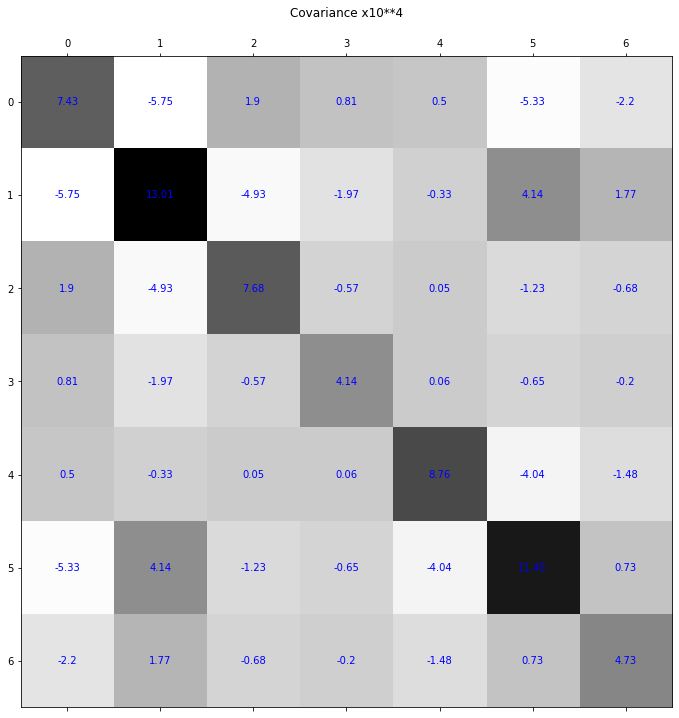

In [ ]:
#THIS IS TO SHOW THE COVARIANCE BETWEEN THE PARAMETRS CORRESPONDING IN SAME ORDER AS ALPHA, A, B, C, D, E, F

plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
plt.title('Covariance x10**4')
ax.matshow(cov_of_guassian, cmap='Greys')

for i in range(no_of_parameters):
   for j in range(no_of_parameters):
      c = cov_of_guassian[j, i]
      ax.text(i, j, np.round(float(c)*10**4,2), va='center', ha='center',c='b')

plt.show()

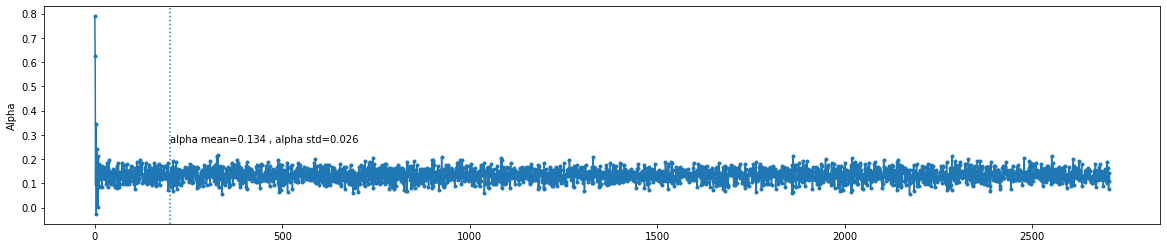

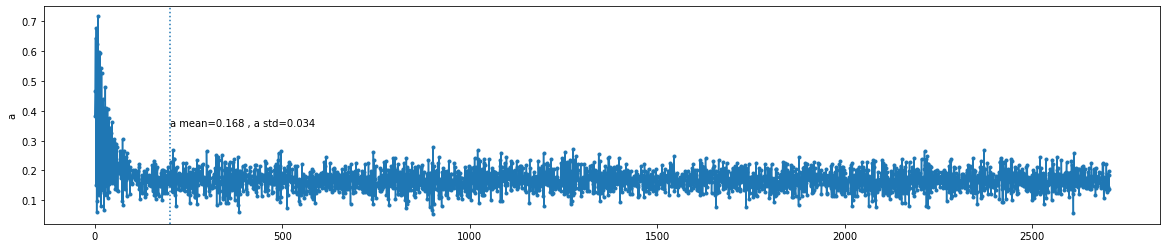

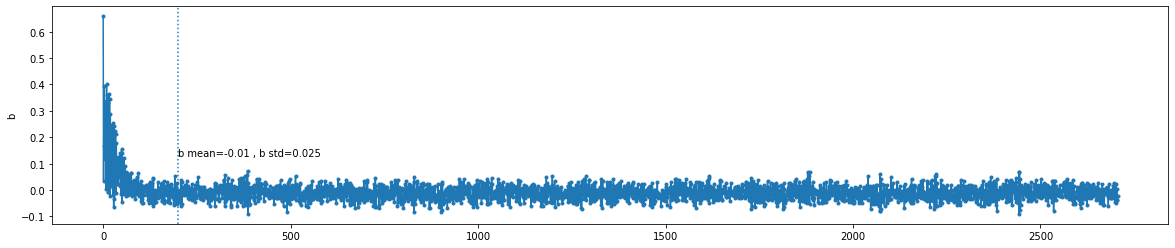

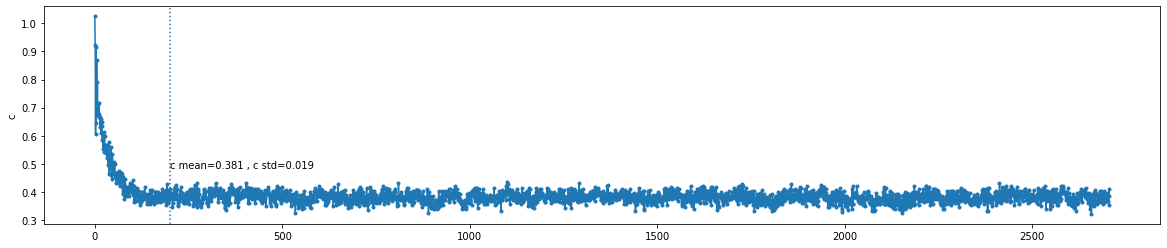

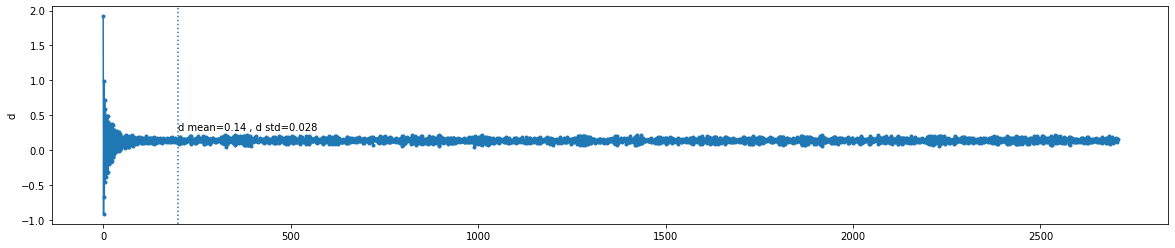

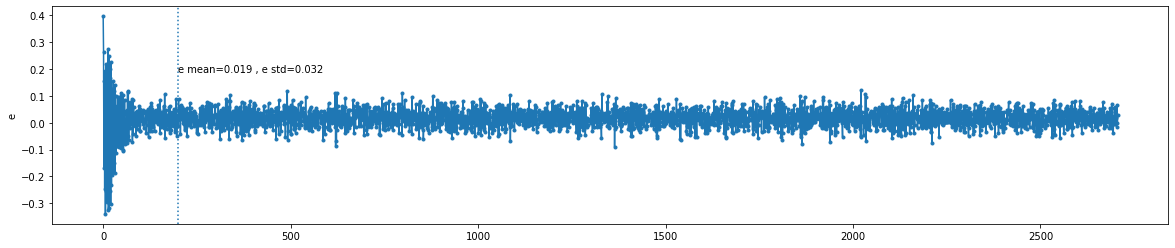

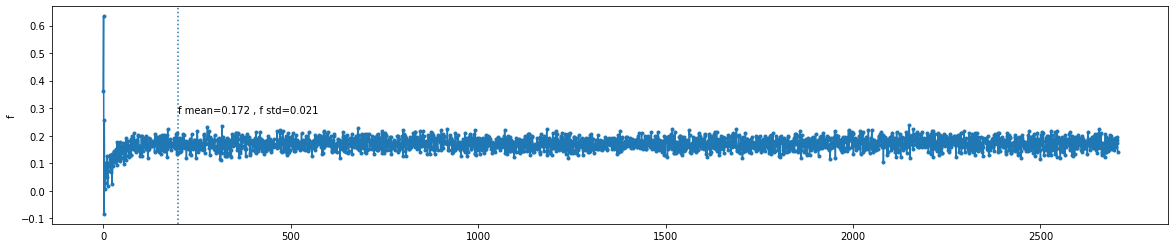

In [ ]:
#THIS IS FOR DISPLAYING HMC CHAINS

numbers2=np.arange(len(x_alpha_hmc))
cutoff2=200
displayupto=5000
plt.figure(figsize=(20,4))
plt.plot(numbers2[:displayupto],x_alpha_hmc[:displayupto],marker='.')
plt.text(cutoff2,np.mean(alpha_stationary)+5*np.std(alpha_stationary),f'alpha mean={np.round(np.mean(x_alpha_hmc[cutoff2:]),3)} , alpha std={np.round(np.std(x_alpha_hmc[cutoff2:]),3)}')
plt.axvline(cutoff2,linestyle=':')
plt.ylabel('Alpha')

plt.figure(figsize=(20,4))
plt.plot(numbers2[:displayupto],x_a_hmc[:displayupto],marker='.')
plt.text(cutoff2,np.mean(a_stationary)+5*np.std(a_stationary),f'a mean={np.round(np.mean(x_a_hmc[cutoff2:]),3)} , a std={np.round(np.std(x_a_hmc[cutoff2:]),3)}')
plt.axvline(cutoff2,linestyle=':')
plt.ylabel('a')

plt.figure(figsize=(20,4))
plt.plot(numbers2[:displayupto],x_b_hmc[:displayupto],marker='.')
plt.text(cutoff2,np.mean(b_stationary)+5*np.std(b_stationary),f'b mean={np.round(np.mean(x_b_hmc[cutoff2:]),3)} , b std={np.round(np.std(x_b_hmc[cutoff2:]),3)}')
plt.axvline(cutoff2,linestyle=':')
plt.ylabel('b')

plt.figure(figsize=(20,4))
plt.plot(numbers2[:displayupto],x_c_hmc[:displayupto],marker='.')
plt.text(cutoff2,np.mean(c_stationary)+5*np.std(c_stationary),f'c mean={np.round(np.mean(x_c_hmc[cutoff2:]),3)} , c std={np.round(np.std(x_c_hmc[cutoff2:]),3)}')
plt.axvline(cutoff2,linestyle=':')
plt.ylabel('c')

plt.figure(figsize=(20,4))
plt.plot(numbers2[:displayupto],x_d_hmc[:displayupto],marker='.')
plt.text(cutoff2,np.mean(d_stationary)+5*np.std(d_stationary),f'd mean={np.round(np.mean(x_d_hmc[cutoff2:]),3)} , d std={np.round(np.std(x_d_hmc[cutoff2:]),3)}')
plt.axvline(cutoff2,linestyle=':')
plt.ylabel('d')

plt.figure(figsize=(20,4))
plt.plot(numbers2[:displayupto],x_e_hmc[:displayupto],marker='.')
plt.text(cutoff2,np.mean(e_stationary)+5*np.std(e_stationary),f'e mean={np.round(np.mean(x_e_hmc[cutoff2:]),3)} , e std={np.round(np.std(x_e_hmc[cutoff2:]),3)}')
plt.axvline(cutoff2,linestyle=':')
plt.ylabel('e')

plt.figure(figsize=(20,4))
plt.plot(numbers2[:displayupto],x_f_hmc[:displayupto],marker='.')
plt.text(cutoff2,np.mean(f_stationary)+5*np.std(f_stationary),f'f mean={np.round(np.mean(x_f_hmc[cutoff2:]),3)} , f std={np.round(np.std(x_f_hmc[cutoff2:]),3)}')
plt.axvline(cutoff2,linestyle=':')
plt.ylabel('f')

plt.show()

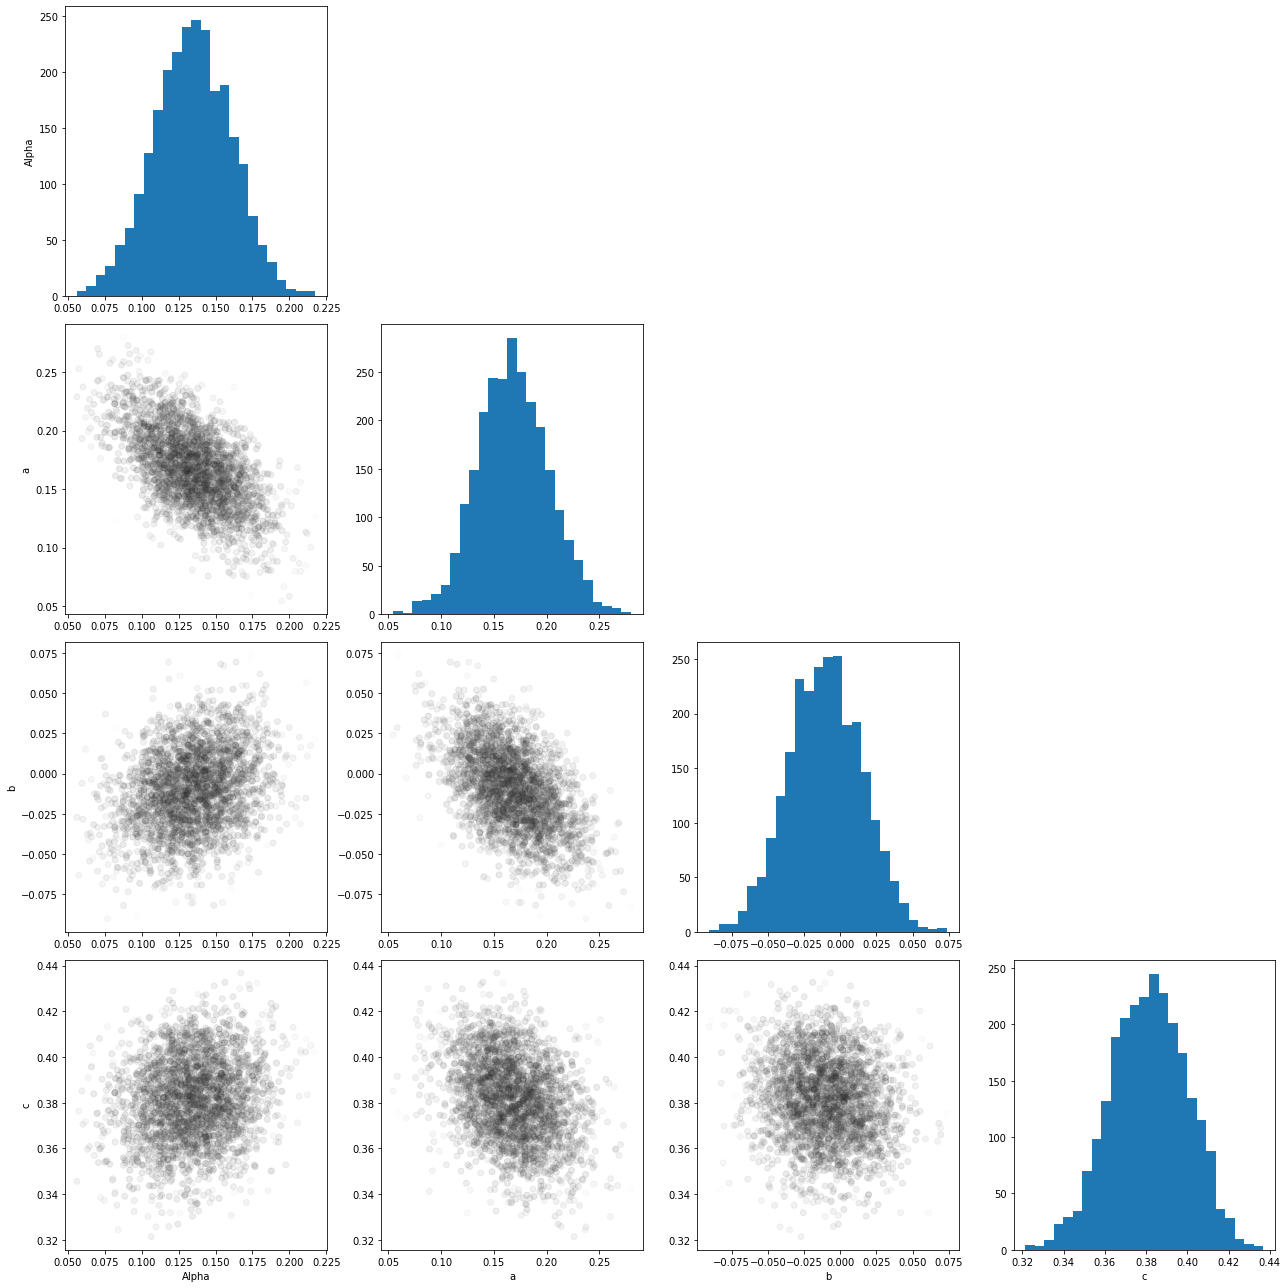

In [ ]:
#SAME GRAPH AS BEFORE WITH PARAMETERS AFFECTING Dx


plt.figure(figsize=(18,18))
plt.subplot(4,4,1)
plt.hist(x_alpha_hmc[cutoff2:],bins=25)
plt.ylabel('Alpha')

plt.subplot(4,4,5)
plt.scatter(x_alpha_hmc[cutoff2:],x_a_hmc[cutoff2:],c=(likelihood_hmc[cutoff2:]),cmap='Greys',alpha=0.12)
plt.ylabel('a')

plt.subplot(4,4,6)
plt.hist(x_a_hmc[cutoff2:],bins=25)


plt.subplot(4,4,9)
plt.scatter(x_alpha_hmc[cutoff2:],x_b_hmc[cutoff2:],c=(likelihood_hmc[cutoff2:]),cmap='Greys',alpha=0.12)
plt.ylabel('b')

plt.subplot(4,4,10)
plt.scatter(x_a_hmc[cutoff2:],x_b_hmc[cutoff2:],c=(likelihood_hmc[cutoff2:]),cmap='Greys',alpha=0.12)

plt.subplot(4,4,11)
plt.hist(x_b_hmc[cutoff2:],bins=25)

plt.subplot(4,4,13)
plt.scatter(x_alpha_hmc[cutoff2:],x_c_hmc[cutoff2:],c=(likelihood_hmc[cutoff2:]),cmap='Greys',alpha=0.12)
plt.ylabel('c')
plt.xlabel('Alpha')

plt.subplot(4,4,14)
plt.scatter(x_a_hmc[cutoff2:],x_c_hmc[cutoff2:],c=(likelihood_hmc[cutoff2:]),cmap='Greys',alpha=0.12)
plt.xlabel('a')

plt.subplot(4,4,15)
plt.scatter(x_b_hmc[cutoff2:],x_c_hmc[cutoff2:],c=(likelihood_hmc[cutoff2:]),cmap='Greys',alpha=0.12)
plt.xlabel('b')

plt.subplot(4,4,16)
plt.hist(x_c_hmc[cutoff2:],bins=25)
plt.xlabel('c')

plt.show()


In [ ]:
print('After multiplying by 19.8 to scake Alpha from MH-MCMC to arcseconds we get Alpha=',np.mean(alpha_stationary)*19.8 ,'with std',np.std(alpha_stationary)*19.8,)
print('which is more in line with Einsteins(1.75) predicted difference than is with Newtons(0.9)')

After multiplying by 19.8 to scake Alpha from MH-MCMC to arcseconds we get Alpha= 2.652277473423929 with std 0.5395431475274549
which is more in line with Einsteins(1.75) predicted difference than is with Newtons(0.9)
